# Prepare a Dataset: Working with XML Data using Python

Autor:innen:
- Roman Bleier
- Martina Scholger

In [ ]:
# Python libraries for operating system interfaces and file names
import os, glob

# Pandas library
import pandas as pd

# Python standard library for XML processing
import xml.etree.ElementTree as ET

### Import Google Drive and set the datasets/parlamint directory

In [ ]:
# import Google Drive
# this needs to be done every time you open a notebook that uses data from your Google Drive
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
# move to the correct folder where the dataset is located
%cd /content/drive/MyDrive/clariah2025-dse-ml/materials/datasets/parlamint

In [ ]:
# check if you are in the correct directory
# you should now see the content of the materials/datasets/parlamint folder
%ls

### Read the sample TEI file from the current directory (datasets/parlamint) directory

In [ ]:
# file name to the TEI sample file from a ParlaMint corpus
f_name = "ParlaMint-IT-en_2022-01-03-LEG18-Senato-sed-392.ana.xml"

In [ ]:
# open the TEI file and parse it using the ET library 
with open(f_name, "rb") as f:
    tree = ET.parse(f)

# set the document root of the XML document
root = tree.getroot()

### Getting all sentence elements (tei:s)

In [ ]:
# namespace map with the namespaces we might use
NSMAP = {"tei": "http://www.tei-c.org/ns/1.0", 
          "xml": "http://www.w3.org/XML/1998/namespace"
}

sentences = root.findall(".//tei:body//tei:s", namespaces=NSMAP)

#you could do the same using the lxml library
#lxml has additional functionality, for instance the xpath method for more complex queries
#sentences = tree.xpath("//tei:body//tei:s", namespaces=NSMAP)

sentences[:5]

### Getting the text from the first sentence in the XML file

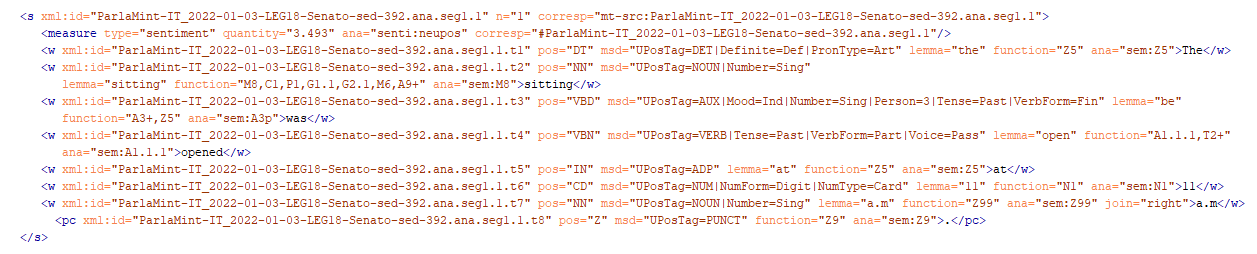

In [ ]:
#with the method itertext() you can get the text of the sentences
#as you will see new line chracters \n are also included
#for more complex queries the use of the lxml library xpath method might be better suited
[t for t in sentences[0].itertext()]

In [ ]:
#use the re library to apply a regular expression for filtering out the new line charcters
import re
[t for t in sentences[0].itertext() if not re.match("\n", t)]

In [ ]:
#we also want the sentence ID to reference sentences back
sentences[0].attrib["{http://www.w3.org/XML/1998/namespace}id"]

### Iterate over all sentences and the the sentence IDs and text of each sentence

In [ ]:
# lists to store the texts and IDs
texts = []
ids = []

# loop over all sentence elements (tei:s)
for s in sentences:
    s_texts = [t for t in s.itertext() if not re.match("\n", t)]
    #join the list s_texts to a sentence string before adding it to the list texts
    #as you will see later the joining with whitespace produces whitespace at place we might not want it, e.g. before punctuation, further processing might be necessary
    texts.append(" ".join(s_texts))
    ids.append(s.attrib["{http://www.w3.org/XML/1998/namespace}id"])  

### Read your texts and ids into a Pandas Dataframe

In [ ]:
# create a Pandas DataFrame object and add the lists as data for the columns IDs and Texts
df = pd.DataFrame({"IDs":ids, "Texts":texts})

# show the first 5 rows of your DataFrame
df.head()

In [ ]:
# write your DataFrame to a csv file, use tabs \t as separators
# the csv file will be saved to your Google Drive
df.to_csv("ParlaMint-IT-en_2022-01-03-LEG18-Senato-sed-392.ana.csv", sep="\t", index=False)

In [ ]:
# now read in your new csv into a Pandas DataFrame
df = pd.read_csv("ParlaMint-IT-en_2022-01-03-LEG18-Senato-sed-392.ana.csv", sep="\t")

# show the first 5 rows of your DataFrame
df.head()

### Do some basic analysis of the corpus you have

In [ ]:
# create an additional column in your DataFrame containing the length of each text
df["char_count"] = df["Texts"].str.len()
df.head()

In [ ]:
# now we can do a basic analysis of this column to get an idea how long the texts in our corpus are
df.describe()

In [ ]:
# now let us inspect the very short texts
df[df["char_count"] < 50].head()

In [ ]:
# if we do not need a column anymore, we can simply drop it
df.drop("char_count", axis=1, inplace=True)
df.head()

## License
The teaching material is available at [https://github.com/DHGraz/clariah2025-dse-ml/tree/main/materials](https://github.com/DHGraz/clariah2025-dse-ml/tree/main/materials) under the creative commons license **CC-BY-NC**. 
Please cite the notebooks and presentation by attributing the author and the GitHub repository.